In [ ]:
Question No. 1:
Theory and concepts:

In [ ]:
1. Explain the concept of batch normalization in the context of Artificial Neural Networks.

Batch Norm is a normalization technique done between the layers of a Neural Network instead of in the raw data. It is done along mini-batches
instead of the full data set. It serves to speed up training and use higher learning rates, making learning easier.

2. Describe the benefits of using batch normalization during training.

Accelerated training: Batch normalization reduces the internal covariate shift by normalizing the inputs to each layer. This helps in
stabilizing and accelerating the training process, allowing the network to converge faster. With batch normalization, the learning algorithm 
can make larger updates to the model parameters, leading to faster overall training.
Improved generalization: By reducing the internal covariate shift, batch normalization acts as a regularizer, which helps in preventing
overfitting. It reduces the reliance on specific weights or activations and encourages the network to learn more generalizable features. This 
can lead to better generalization performance, especially when dealing with limited training data.
Mitigating the vanishing/exploding gradients problem: Deep neural networks often suffer from the problem of vanishing or exploding gradients,
especially in deeper layers. Batch normalization helps in alleviating this issue by keeping the activations within a desirable range. It 
normalizes the activations and ensures that the gradients flowing through the network are neither too large nor too small, thus improving the 
stability of the optimization process.
Reducing the need for manual hyperparameter tuning: Batch normalization reduces the dependence on certain hyperparameters, such as the learning
rate, to achieve good performance. It makes the network more robust to different learning rates and allows for faster convergence. This reduces
the need for extensive manual tuning, saving time and effort in the model development process.

3.Discuss the working principle of batch normalization, including the normalization step and the learnable parameters.
In the following image, we can see a regular feed-forward Neural Network: x_i are the inputs, z the output of the neurons, a the output of 
the activation functions, and y the output of the network:


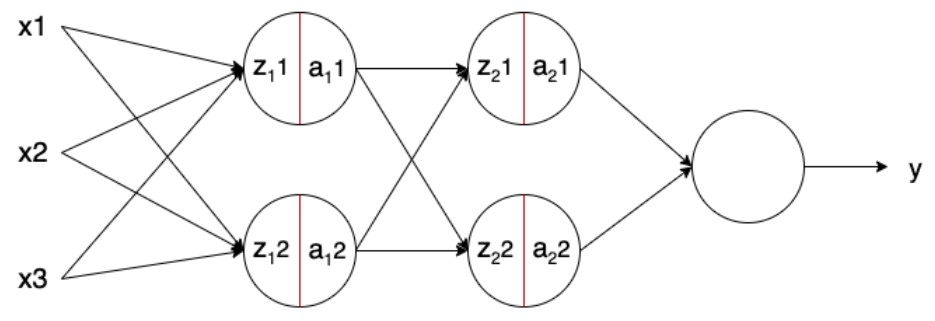

Batch Norm – in the image represented with a red line – is applied to the neurons’ output just before applying the activation function.Usually,
a neuron without Batch Norm would be computed as follows:

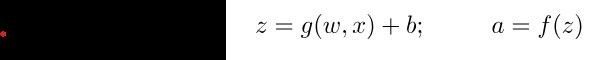

In [ ]:
being g() the linear transformation of the neuron, w the weights of the neuron, b the bias of the neurons, and f() the activation function.
The model learns the parameters w and b. Adding Batch Norm, it looks as:

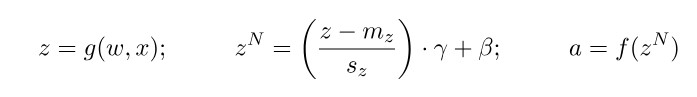

In [ ]:
being z^N the output of Batch Norm, m_z the mean of the neurons’ output, s_z the standard deviation of the output of the neurons, and \gamma 
and \beta learning parameters of Batch Norm. Note that the bias of the neurons (b) is removed. This is because as we subtract the mean m_z, 
any constant over the values of z – such as b – can be ignored as it will be subtracted by itself.

The parameters \beta and \gamma shift the mean and standard deviation, respectively. Thus, the outputs of Batch Norm over a layer results in
a distribution with a mean \beta and a standard deviation of \gamma. These values are learned over epochs and the other learning parameters,
such as the weights of the neurons, aiming to decrease the loss of the model.

In [ ]:
Question No. 2:
Implementation:
1. Choose a dataset of your choice (e.g., MNIST, CIAR-0) and preprocess it.
2. Implement a simple feedforward neural network using any deep learning framework/library (e.g.,Tensorlow, PyTorch).
3. Train the neural network on the chosen dataset without using batch normalization.

Training model without Batch Normalization

In [1]:
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 2.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 73.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 71.9 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 73.8 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 54.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.8/181.8 kB 24.0 MB/s eta 0:

In [2]:
##importing necessary librbaries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import os
import time
##load dataset
mnist=tf.keras.datasets.mnist
##training the dataset
(X_train_full,y_train_full),(X_test,y_test)=mnist.load_data()
##creating validation data from train_full
X_valid,X_train=X_train_full[:5000]/255.,X_train_full[5000:]/255.
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
#scale the test data
X_test=X_test/255.
##creating layers of ANN wiithout BatchNormalization
LAYERS=[tf.keras.layers.Flatten(input_shape=[28,28]),
       tf.keras.layers.Dense(300, kernel_initializer='he_normal'),
        tf.keras.layers.LeakyReLU(),
        tf.keras.layers.Dense(100,kernel_initializer='he_normal'),
        tf.keras.layers.LeakyReLU(),
        tf.keras.layers.Dense(10,activation='softmax')
       
       ]
model=tf.keras.models.Sequential(LAYERS)

##compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.legacy.SGD(lr=1e-3),metrics=['accuracy'])
#now training &calculating time
start=time.time()

history=model.fit(X_train,y_train,validation_data=(X_valid,y_valid),epochs=10,verbose=2)

end=time.time()
print('total runtime of the program is',{end-start})
pd.DataFrame(history.history)

2023-08-30 05:39:11.927966: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-30 05:39:12.000376: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-30 05:39:12.001248: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-30 05:39:13.144418: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


11490434/11490434 [==============================] - 2s 0us/step


/opt/conda/lib/python3.10/site-packages/keras/src/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
1719/1719 - 5s - loss: 1.5790 - accuracy: 0.5867 - val_loss: 0.9858 - val_accuracy: 0.7886 - 5s/epoch - 3ms/step
Epoch 2/10
1719/1719 - 4s - loss: 0.7719 - accuracy: 0.8186 - val_loss: 0.6111 - val_accuracy: 0.8464 - 4s/epoch - 2ms/step
Epoch 3/10
1719/1719 - 4s - loss: 0.5572 - accuracy: 0.8553 - val_loss: 0.4855 - val_accuracy: 0.8732 - 4s/epoch - 2ms/step
Epoch 4/10
1719/1719 - 4s - loss: 0.4714 - accuracy: 0.8717 - val_loss: 0.4254 - val_accuracy: 0.8868 - 4s/epoch - 2ms/step
Epoch 5/10
1719/1719 - 4s - loss: 0.4243 - accuracy: 0.8821 - val_loss: 0.3881 - val_accuracy: 0.8940 - 4s/epoch - 2ms/step
Epoch 6/10
1719/1719 - 4s - loss: 0.3937 - accuracy: 0.8896 - val_loss: 0.3626 - val_accuracy: 0.9018 - 4s/epoch - 2ms/step
Epoch 7/10
1719/1719 - 4s - loss: 0.3716 - accuracy: 0.8945 - val_loss: 0.3439 - val_accuracy: 0.9076 - 4s/epoch - 2ms/step
Epoch 8/10
1719/1719 - 4s - loss: 0.3547 - accuracy: 0.8991 - val_loss: 0.3300 - val_accuracy: 0.9104 - 4s/epoch - 2ms/step
Epoch 9/

,loss,accuracy,val_loss,val_accuracy
0,1.578950,0.586691,0.985829,0.7886
1,0.771886,0.818564,0.611096,0.8464
2,0.557189,0.855345,0.485522,0.8732
3,0.471404,0.871727,0.425428,0.8868
4,0.424317,0.882109,0.388067,0.8940
5,0.393696,0.889600,0.362579,0.9018
6,0.371587,0.894545,0.343901,0.9076
7,0.354667,0.899091,0.329982,0.9104
8,0.341016,0.902527,0.317668,0.9142
9,0.329746,0.905691,0.308115,0.9148


In [ ]:
4. Implement batch normalization layers in the neural network and train the model again.
5. Compare the training and validation performance (e.g., accuracy, loss) between the models with and without batch normalization.

Training model with Batch Normalization

AFTER APPLYING BATCHNORMALIZATION

In [3]:
##load dataset
mnist1=tf.keras.datasets.mnist
##training the dataset
(X_train_full,y_train_full),(X_test,y_test)=mnist1.load_data()
##creating validation data from train_full
X_valid,X_train=X_train_full[:5000]/255.,X_train_full[5000:]/255.
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
#scale the test data
X_test=X_test/255.
#defining new model with batch normalization
LAYERS=[tf.keras.layers.Flatten(input_shape=[28,28]),
       tf.keras.layers.BatchNormalization(),
       tf.keras.layers.Dense(300,activation='relu'),
       tf.keras.layers.BatchNormalization(),
       tf.keras.layers.Dense(100,activation='relu'),
       tf.keras.layers.BatchNormalization(),
       tf.keras.layers.Dense(10,activation='softmax')]
model_clf=tf.keras.models.Sequential(LAYERS)
model_clf.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.legacy.SGD(lr=1e-3),metrics=['accuracy'])
#now training &calculating time
start=time.time()

history=model_clf.fit(X_train,y_train,validation_data=(X_valid,y_valid),epochs=10,verbose=2)

end=time.time()
print('total runtime of the program is',{end-start})
pd.DataFrame(history.history)

/opt/conda/lib/python3.10/site-packages/keras/src/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
1719/1719 - 7s - loss: 0.8635 - accuracy: 0.7370 - val_loss: 0.4624 - val_accuracy: 0.8726 - 7s/epoch - 4ms/step
Epoch 2/10
1719/1719 - 6s - loss: 0.4284 - accuracy: 0.8743 - val_loss: 0.3462 - val_accuracy: 0.9046 - 6s/epoch - 4ms/step
Epoch 3/10
1719/1719 - 6s - loss: 0.3477 - accuracy: 0.8981 - val_loss: 0.2939 - val_accuracy: 0.9156 - 6s/epoch - 4ms/step
Epoch 4/10
1719/1719 - 6s - loss: 0.3045 - accuracy: 0.9105 - val_loss: 0.2646 - val_accuracy: 0.9254 - 6s/epoch - 4ms/step
Epoch 5/10
1719/1719 - 6s - loss: 0.2780 - accuracy: 0.9184 - val_loss: 0.2404 - val_accuracy: 0.9344 - 6s/epoch - 4ms/step
Epoch 6/10
1719/1719 - 6s - loss: 0.2565 - accuracy: 0.9250 - val_loss: 0.2258 - val_accuracy: 0.9382 - 6s/epoch - 4ms/step
Epoch 7/10
1719/1719 - 6s - loss: 0.2382 - accuracy: 0.9293 - val_loss: 0.2151 - val_accuracy: 0.9412 - 6s/epoch - 4ms/step
Epoch 8/10
1719/1719 - 6s - loss: 0.2254 - accuracy: 0.9345 - val_loss: 0.2063 - val_accuracy: 0.9442 - 6s/epoch - 4ms/step
Epoch 9/

,loss,accuracy,val_loss,val_accuracy
0,0.863457,0.737036,0.462419,0.8726
1,0.428351,0.874345,0.346177,0.9046
2,0.347701,0.898073,0.293886,0.9156
3,0.304502,0.910491,0.264607,0.9254
4,0.278039,0.918364,0.240363,0.9344
5,0.256525,0.925018,0.225836,0.9382
6,0.238248,0.929291,0.215111,0.9412
7,0.225366,0.934545,0.206283,0.9442
8,0.211486,0.937982,0.197069,0.9464
9,0.202642,0.939927,0.192107,0.9482


In [ ]:
6.Discuss the impact of batch normalization on the training process and the performance of the neural network.
from above dataframe we can see that the training_accuracy and the val_accuracy has increased.without applying batchnormalization the
training_accuracy was 90% and validation_acccuracy was 91%,But after applying BatchNormalization the training accuracy became 93% and the 
validation_accuracy was 94%.we can see that after applying BatchNormalization accuracy of model increases.

In [ ]:
2. Discuss the advantages and potential limitations of batch normalization in improving the training of neural networks.

In [ ]:
Advantages of Batch Normalization:

Accelerated convergence: Batch normalization helps neural networks converge faster by reducing the internal covariate shift. By normalizing the 
activations of each layer, it ensures that the mean activation is close to zero and the standard deviation is close to one. This allows for
more stable and efficient gradient propagation, enabling faster convergence.

Improved generalization: Batch normalization acts as a form of regularization by adding a small amount of noise to the network during training.
This noise helps to reduce overfitting and improves the generalization ability of the model. It has been observed that models with batch
normalization tend to generalize better to unseen data.

Reduction of the dependence on initialization: Batch normalization reduces the sensitivity of neural networks to the choice of weight
initialization. By normalizing the inputs to each layer, it mitigates the impact of initialization choices, making the network more robust to 
different initialization schemes.

Handling of different batch sizes: Batch normalization is effective in handling different batch sizes during training. It normalizes the 
activations based on the statistics computed from the mini-batch, allowing flexibility in choosing the batch size without significantly 
affecting the performance of the model.

Limitations of Batch Normalization:

Dependency on batch size: Although batch normalization handles different batch sizes, its performance can be affected by very small batch sizes.
When the batch size is too small, the estimated statistics may become less reliable, leading to suboptimal performance. However, this 
limitation can be mitigated by techniques such as running mean and variance estimation or using larger batch sizes.

Increased memory consumption: Batch normalization requires storing and updating running mean and variance statistics during training. This 
introduces additional memory overhead, especially when training large models or working with limited computational resources. However, the 
memory requirement can be reduced by utilizing optimized implementations and hardware accelerators.

Influence of batch order: The order of samples within a batch can have an impact on the statistics used for normalization. This can introduce a
small amount of variability during training and affect the final performance. However, this limitation is generally not significant and can be
mitigated by shuffling the training data between epochs.

Incompatibility with certain network architectures: Batch normalization may not work well with certain network architectures that have complex
or dynamic internal dependencies. For example, networks that use recurrent connections or self-attention mechanisms may not benefit from batch
normalization or require modifications to the technique to make it suitable for such architectures.